# Birdsongs - 02.- Obteniendo Datos - Seleccionando especies

Realiza un proceso exploratorio del dataset obtenido como consencuencia del scrapping de la web de Xeno-Canto, y a partir de el, realizaremos una selección de aquellas especies con las que vamos a trabajar.

Podríamos trabajar con todas las especies que forman parte del dataset que tenemos, pero para el objetivo del TFM, seleccionar un numero inferior será una mejor opción, tanto para el volumen de datos que vamos a manejar, como para luego las necesidades de recursos y tiempo de entrenamiento de los modelos.

A partir del estudio del dataset seleccionaremos aquellas especies de las que tengamos más grabaciones, ya que será mejor para cualquier modelo que testeemos, y no tendremos necesidad de crear datos simulados en un primer momento.

El resultado de este notebook será un fichero csv que contendra las grabaciones de las especies con las que vamos a trabajar, **el dataset**. 


## 1.- Librerías

Cargamos la librerías de uso común en el notebook. Para la visualización de datos vamos a utilizar [**seaborn**](https://seaborn.pydata.org/), que es una librería de visualización basada en matplotlib.

Para su instalación a través de conda:

    conda install -c anaconda seaborn 

In [25]:
# importar librerías
import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

## 2.- Carga dataframe

Cargamos el dataframe que contiene la información de los registros de audio que nos hemos descargado desde la web de Xeno-Canto. Este dataframe es el que hemos recuperado haciendo web scrapping de la web desde **Birdsongs_01_Obteniendo_Datos_Webscrapping_DataSet.ipynb**


* **Common**: nombre común de la especie
* **Scientific**: nombre científico de la especie
* **Length**: duración de la grabación en formato HH:MM
* **Recordist**: persona que realiza la grabación
* **Country**: país donde se realiza la grabación
* **Location**: localidad donde se realiza la grabación
* **Type**: tipo de canto grabado (canto, llamada, vuelo, etc, etc)
* **ID**: identificador único de la grabación
* **Class**: calidad del audio
* **Seconds**: duración en número de segundos
* **Name**: nombre científico normalizado (Genero especie)



In [30]:
path_file = 'Birdsongs_europe_q>%3AC_20190107181700.csv'
df = pd.read_csv(path_file) 

In [31]:
df.head()

,Common,Scientific,Length,Recordist,Date,Country,Location,Type,ID,Class,Seconds,Name
0,Greater Rhea,Rhea americana,0:03,Lars Lachmann,2013-02-16 00:00:00,Germany,east of Ratzeburger See,call,XC127145,1,3,Rhea americana
1,Black-bellied Whistling Duck,Dendrocygna autumnalis,1:09,Stanislas Wroza,2017-05-12 00:00:00,France,"Vauvert, Gard, Languedoc-Roussillon",flight call,XC369589,1,69,Dendrocygna autumnalis
2,Brant Goose,Branta bernicla,0:40,Juha Saari,2018-10-17 00:00:00,Finland,"Helsinki, Helsinki, Uusimaa","flight call, nocturnal flight call",XC441695,0,40,Branta bernicla
3,Brant Goose,Branta bernicla bernicla,0:28,Jarek Matusiak,2018-10-06 00:00:00,Poland,Półwysep Helski,"female, flight call, male",XC437760,0,28,Branta bernicla
4,Brant Goose,Branta bernicla bernicla,0:12,Jarek Matusiak,2018-10-06 00:00:00,Poland,Półwysep Helski,"flight call, wings",XC437751,0,12,Branta bernicla


In [32]:
df.describe()

,Class,Seconds
count,45744.000000,45744.000000
mean,1.464892,66.691872
std,0.591045,105.718153
min,0.000000,0.000000
25%,1.000000,17.000000
50%,2.000000,36.000000
75%,2.000000,75.000000
max,2.000000,2846.000000


## 3.- Explora duración de las grabaciones

Estudiar la duración de las grabaciones para ver el rango de duraciones de las que disponemos y si hay valores desmedidos (outliers)

count    45744.000000
mean        66.691872
std        105.718153
min          0.000000
25%         17.000000
50%         36.000000
75%         75.000000
max       2846.000000
Name: Seconds, dtype: float64


Text(0.5, 1.0, 'Record Lenght')

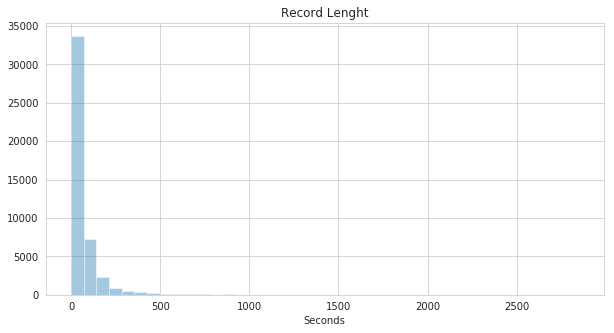

In [33]:
# estadísticos
print(df['Seconds'].describe())

# ploteamos la distribución
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['Seconds'], bins = 40, kde=False, ax=ax)
plt.title("Record Lenght")


Existen grabaciones excesivamente largas para el objeto de estudio, nos quedaremos con aquellas grabaciones inferiores a un minuto, que representan casi el 75% de las grabaciones del dataset. 

El tratamiento de grabaciones superiores a un minuto se dispararán en tiempos de procesado y de almacenamiento. Lo normal es que el canto pueda repetirse a lo largo del tiempo, pero los sonidos serán repetitivos

Según indica Carlos de Hita:

https://www.elmundo.es/especiales/2008/05/ciencia/sonido_naturaleza/sonidos_12_03_2010.html

>La duración, por último, puede ser indefinida –los chirridos de los gorriones, aviones comunes o los silbidos anárquicos de los estorninos-, muy corta –el restallar de las chovas piquirrojas-, de unos pocos segundos –chochines, la cascada descendente de un pinzón vulgar o el fraseo como desganado del petirrojo- o muy larga, interminablemente larga -hasta veinte minutos de parloteo continuo en el caso de alondras y calandrias-.

Hay grabaciones superiores a los 30 minutos en el dataset original!!.


count    31238.000000
mean        25.456591
std         16.050231
min          0.000000
25%         12.000000
50%         23.000000
75%         37.000000
max         60.000000
Name: Seconds, dtype: float64


Text(0.5, 1.0, 'Record Lenght (max seconds: 61)')

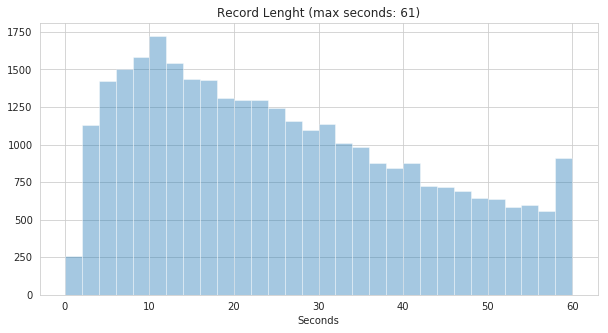

In [34]:
# seleccionar aquellas grabaciones cuya duración sea inferior a 1 minuto
max_seconds = 61
df = df.loc[(df['Seconds'] < max_seconds)]

# visualizamos los estadísticos
print(df['Seconds'].describe())

# ploteamos la nueva distribución
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['Seconds'], bins = 30, kde=False, ax=ax)
plt.title("Record Lenght (max seconds: %s)" % max_seconds)


## 4.- Explora distribución de países

Analizamos como está distribuido el dataset en función de los países donde se ha realizado la grabación del canto, por si vemos algún dato extraño

Text(0.5, 1.0, 'Birdsongs')

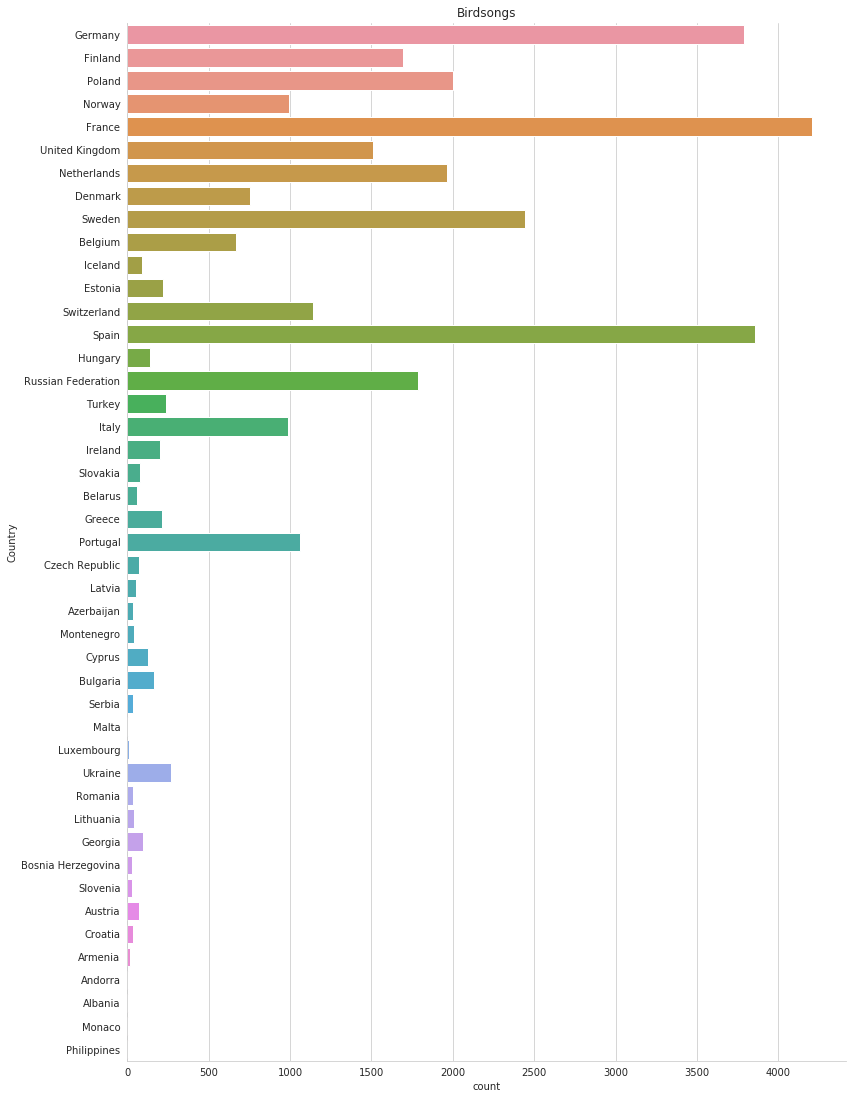

In [35]:
# ploteamos la distribución
sns.set_style("whitegrid")
sns.catplot(y="Country", data=df, kind='count', height=15, aspect=0.8)
plt.title("Birdsongs")


Existen grabaciones pertenecientes a Filipinas!, que deben ser un error de etiquetado al subirla.
Procedemos a eliminarla

In [36]:
df.drop(df.loc[df['Country'] == 'Philippines'].index, inplace=True)


## 5.- Explora distribución de especies

Analizamos como está distribuido el dataset en función de las distintas especies que lo conforman. Creamos para ello un nuevo dataset, agrupando las grabaciones por la especie

In [37]:
# dataframe agrupando por nombre científico
df_especies = df.groupby('Name')['ID'].count()
df_especies = df_especies.reset_index()
df_especies.columns = ['Name', 'Count'] 


### Visualiza la distribución

Echamos un vistazo al número de especies y como está distribuido el dataset en base a esta agrupación

In [39]:
# estadisticas de las especies
print(df_especies.describe())

             Count
count   552.000000
mean     56.588768
std      92.186956
min       1.000000
25%       6.000000
50%      22.000000
75%      75.250000
max    1032.000000


Existen 552 especies distintas en el dataset, y la media de grabaciones es de 56 por especie, que está desplazada con respecto a la mediana (50%). Visualizamos el número de grabaciones por especie.

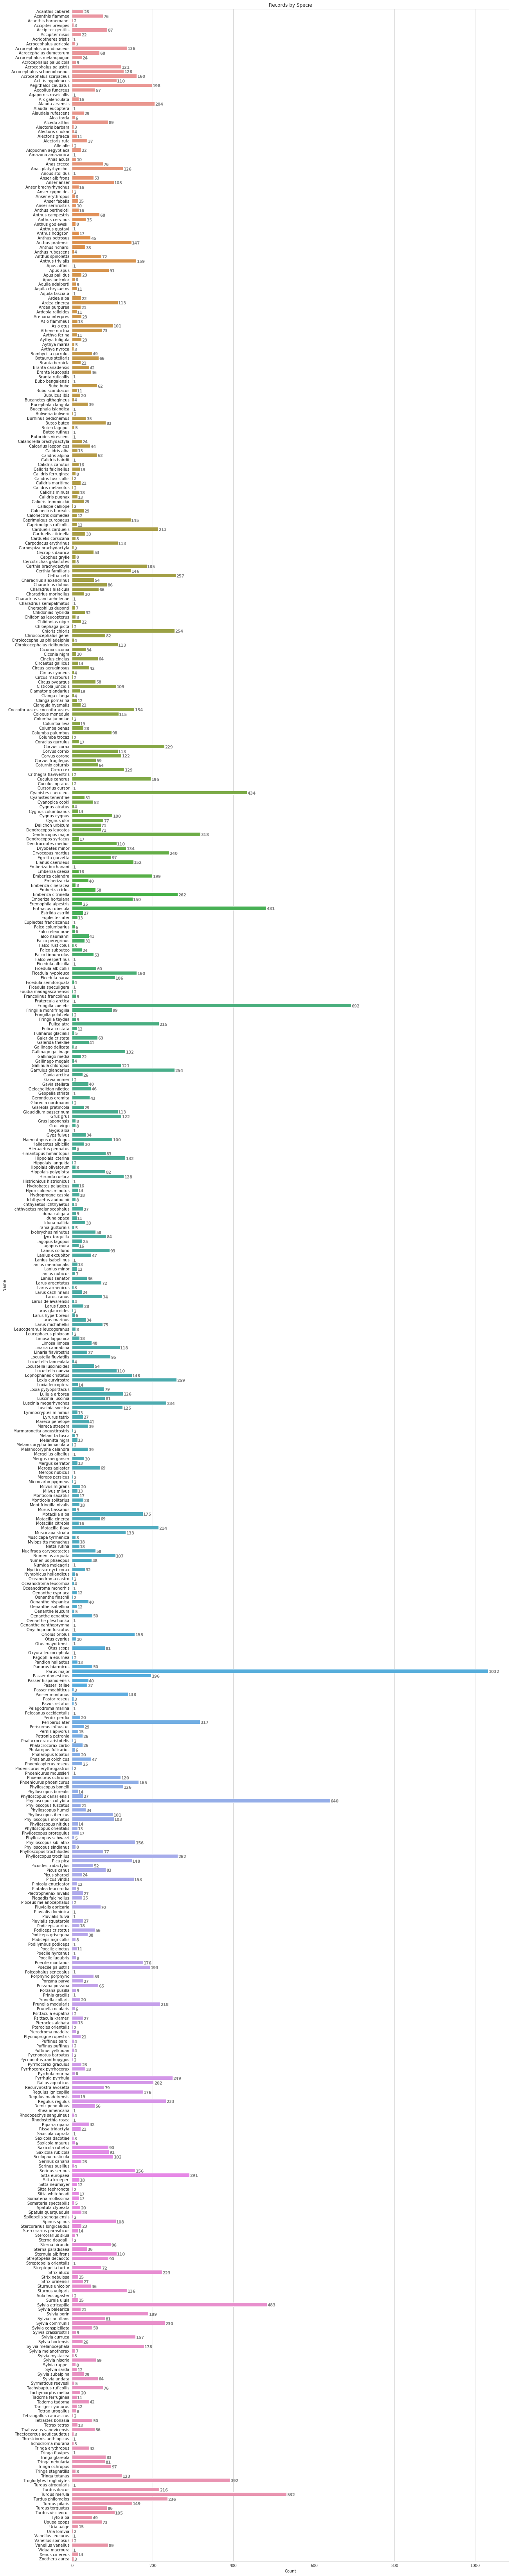

In [41]:
# visualizamos número de grabaciones por especie dentro del dataset
fig, ax = plt.subplots(figsize=(20,120))
sns.barplot(x='Count', y= 'Name', data=df_especies, ax=ax)
plt.title("Records by Specie")

for i, v in enumerate(df_especies["Count"]):
    ax.text(v + 1.25, i + .40, v, color='gray', fontweight='bold')


Visualizamos la distribución

Text(0.5, 1.0, 'Records by Specie')

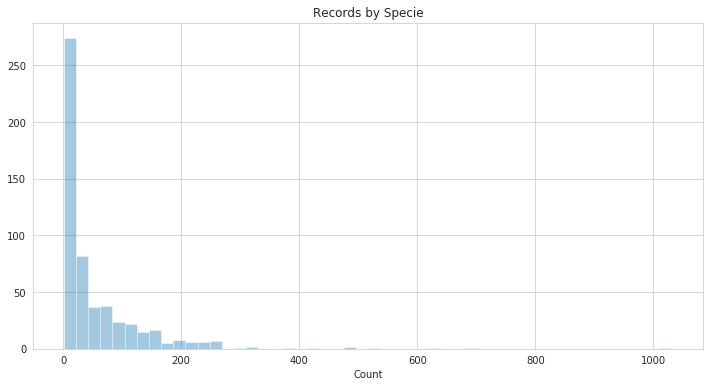

In [42]:
# ploteamos la distribución
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(df_especies['Count'], ax=ax, kde=False)
plt.title("Records by Specie")

Existen bastantes especies con un número relativamente bajo de registros, así como otras de las que existen un número elevado, no están balanceadas.

### Selecciona especies

Vamos a seleccionar aquellas especies de las que disponemos de más de 100 grabaciones, por establecer un criterio de corte, filtrar el número de especies y contar con un número de registros lo más elevado posible. Tenemos que tener en cuenta también las capacidades de procesamiento de los datos posterior.

In [44]:
min_records = 100
df_especies_sel = df_especies.loc[df_especies['Count'] > min_records]

# descripción del dataset
print(df_especies_sel.describe())


             Count
count   102.000000
mean    197.813725
std     136.357330
min     101.000000
25%     122.250000
50%     154.500000
75%     217.500000
max    1032.000000


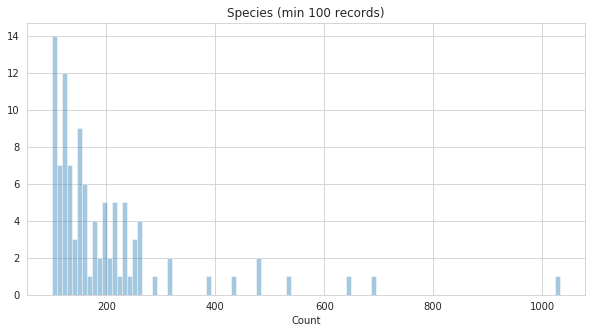

In [47]:
# ploteamos la distribución
plt.figure(figsize=(10, 5))
sns.distplot(df_especies_sel['Count'], hist=True, bins = len(df_especies_sel), kde=False)
plt.title("Species (min %s records)" % min_records)
plt.show()

## 5.- Filtra dataset con las especies seleccionadas

Eliminamos del dataset todas aquellas especies que no forman parte de la selección

In [48]:
df.drop(df.loc[~df['Name'].isin(list(df_especies_sel['Name'].values))].index, inplace=True)

Para balancear y reducir el tamaño del dataset, procedemos a dejar un máximo de grabaciones por especie

In [50]:
# máximo número de registros
np.random.seed(77)
maximum_records = 250

# itera sobre la lista de especies, y va balanceando las especies seleccionadas
for e in list(df_especies_sel['Name'].values):
    # calcular registros a eliminar, si se excede del tamaño máximo
    size = len(df.loc[df['Name'] == e].values) - maximum_records 

    # seleccionar al azar los registros a eliminar
    if size > 0:
        indexdrop = np.random.choice(np.array(df.loc[df['Name'] == e].index), size=size, replace=False)
        df.drop(indexdrop, inplace=True)


Visualizamos el dataset con nuestras especies seleccionadas

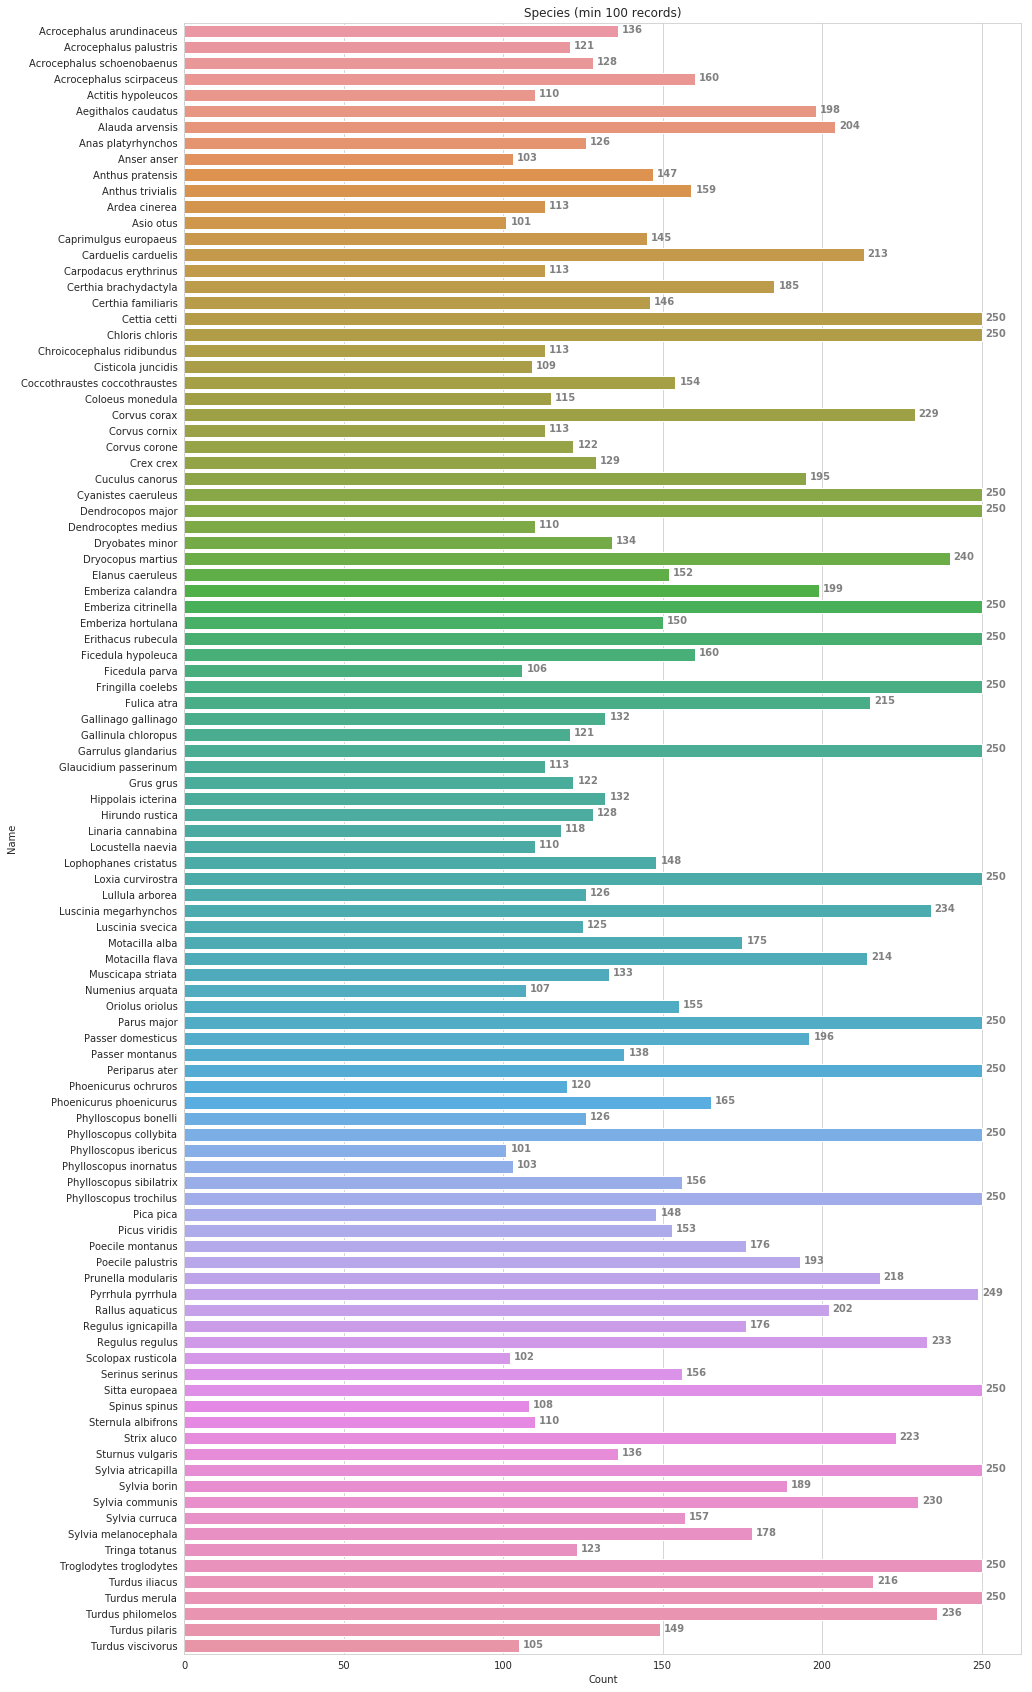

In [54]:
# agrupa sobre el nuevo dataset
df_especies = df.groupby('Name')['ID'].count()

# crea un nuevo dataframe con las especies y el número de registros por cada una de ellas
df_especies = df_especies.reset_index()
df_especies.columns = ['Name', 'Count'] 

# plotea distribución
fig, ax = plt.subplots(figsize=(15,30))
sns.barplot(y='Name', x='Count', data=df_especies, ax=ax)
plt.title("Species (min %s records)" % min_records)

for i, v in enumerate(df_especies["Count"]):
    ax.text(v + 1.25, i + .10, v, color='gray', fontweight='bold')

plt.show()

## 6.- Crea nuevo dataset de especies

Crea un csv con las grabaciones de las especies seleccionadas y otro con el dataset definitivo.

### Guarda dataset de especies seleccionadas

In [55]:
# nombres científicos de las especies
my_especies = df_especies_sel['Name'].values
my_especies

array(['Acrocephalus arundinaceus', 'Acrocephalus palustris',
       'Acrocephalus schoenobaenus', 'Acrocephalus scirpaceus',
       'Actitis hypoleucos', 'Aegithalos caudatus', 'Alauda arvensis',
       'Anas platyrhynchos', 'Anser anser', 'Anthus pratensis',
       'Anthus trivialis', 'Ardea cinerea', 'Asio otus',
       'Caprimulgus europaeus', 'Carduelis carduelis',
       'Carpodacus erythrinus', 'Certhia brachydactyla',
       'Certhia familiaris', 'Cettia cetti', 'Chloris chloris',
       'Chroicocephalus ridibundus', 'Cisticola juncidis',
       'Coccothraustes coccothraustes', 'Coloeus monedula',
       'Corvus corax', 'Corvus cornix', 'Corvus corone', 'Crex crex',
       'Cuculus canorus', 'Cyanistes caeruleus', 'Dendrocopos major',
       'Dendrocoptes medius', 'Dryobates minor', 'Dryocopus martius',
       'Elanus caeruleus', 'Emberiza calandra', 'Emberiza citrinella',
       'Emberiza hortulana', 'Erithacus rubecula', 'Ficedula hypoleuca',
       'Ficedula parva', 'Fringil

In [56]:
# crear csv con las especies seleccionadas
now = datetime.datetime.now()
file = 'Birdsongs_My_Especies_Europe_' + \
        now.strftime("%Y%m%d%H%M%S") + \
        '.csv'

df_especies_sel.to_csv(file, index=False)


## 7.- Guarda dataset de grabaciones

Guardamos el dataframe con las grabaciones pertenecientes a las especies seleccionadas en un fichero csv

In [57]:
# salvar grabaciones seleccionadas a csv
mybirdsongs_csv = 'Birdsongs_My_Birdsongs_Europe_' + \
                    now.strftime("%Y%m%d%H%M%S") + \
                    '.csv'

df.to_csv(mybirdsongs_csv, index=False)
